In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

Спарсила побольше данных в файлик data2.csv

In [297]:
data1 = pd.read_csv('data.csv')
data2 = pd.read_csv('data2.csv')

df = pd.concat([data1, data2], ignore_index=True)
df

,headings,usabilities,used_for_learning,used_for_research,used_for_application,used_for_llm_fine_tuning,well_documented,well_maintained,clean_data,original,high_quality_notebooks,views,downloads,engagements,comments,weight,medal
0,Top 50 Luxury Hotels Worldwide 2024,10.00,0,0,0,0,0,0,0,0,0,5036,1213,0.24087,0,14.69,NaN
1,World's Best Restaurants,10.00,5,0,0,0,1,0,1,0,0,7018,1740,0.24793,0,63.19,Bronze
2,Customer purchase behavior - Electronic Sales ...,10.00,21,0,0,0,6,0,0,1,0,16300,4430,0.27158,0,2488.32,Bronze
3,Melbourne Housing Snapshot,7.06,247,16,9,7,56,20,40,8,12,485000,160000,0.32983,33,2140.16,Gold
4,Canadian Cheese Directory,10.00,1,0,1,0,0,0,0,0,0,5255,938,0.17850,1,147.11,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,COVID-19 Lockdown dates by country,8.82,0,0,0,0,0,0,0,0,0,38900,4376,0.11248,3,43.49,NaN
2576,Spam Email Dataset,10.00,0,0,0,0,0,0,0,0,0,1378,323,0.23440,0,485.70,NaN
2577,CO2 Emissions (USA),6.47,0,0,0,0,0,0,0,0,0,1046,226,0.21606,0,4485.12,NaN
2578,Punjab Stubble Burning Crop Fire Data,9.41,0,0,0,0,0,0,0,0,0,20,2,0.10000,0,1648.64,NaN


#### Обработка отсутствующих значений и категориальных признаков

In [298]:
df['medal'] = df['medal'].fillna('0').astype(str)

In [299]:
label_encoder = LabelEncoder()
df['medal_encoded'] = label_encoder.fit_transform(df['medal'])

In [300]:
df

,headings,usabilities,used_for_learning,used_for_research,used_for_application,used_for_llm_fine_tuning,well_documented,well_maintained,clean_data,original,high_quality_notebooks,views,downloads,engagements,comments,weight,medal,medal_encoded
0,Top 50 Luxury Hotels Worldwide 2024,10.00,0,0,0,0,0,0,0,0,0,5036,1213,0.24087,0,14.69,0,0
1,World's Best Restaurants,10.00,5,0,0,0,1,0,1,0,0,7018,1740,0.24793,0,63.19,Bronze,1
2,Customer purchase behavior - Electronic Sales ...,10.00,21,0,0,0,6,0,0,1,0,16300,4430,0.27158,0,2488.32,Bronze,1
3,Melbourne Housing Snapshot,7.06,247,16,9,7,56,20,40,8,12,485000,160000,0.32983,33,2140.16,Gold,2
4,Canadian Cheese Directory,10.00,1,0,1,0,0,0,0,0,0,5255,938,0.17850,1,147.11,Bronze,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,COVID-19 Lockdown dates by country,8.82,0,0,0,0,0,0,0,0,0,38900,4376,0.11248,3,43.49,0,0
2576,Spam Email Dataset,10.00,0,0,0,0,0,0,0,0,0,1378,323,0.23440,0,485.70,0,0
2577,CO2 Emissions (USA),6.47,0,0,0,0,0,0,0,0,0,1046,226,0.21606,0,4485.12,0,0
2578,Punjab Stubble Burning Crop Fire Data,9.41,0,0,0,0,0,0,0,0,0,20,2,0.10000,0,1648.64,0,0


#### Матрица корреляций

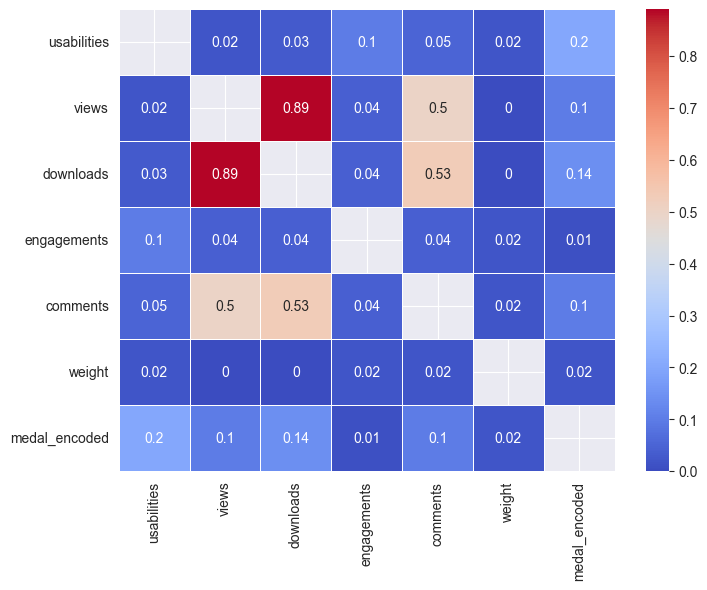

In [301]:
columns = ['usabilities', 'views', 'downloads', 'engagements', 'comments', 'weight', 'medal_encoded']

correlation_matrix = df[columns].corr().abs().round(2)

mask = np.eye(correlation_matrix.shape[0], dtype=bool)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)
plt.show()

#### Гистограммы

In [302]:
df['normalized_views'] = df['views'].apply(np.log1p)

In [303]:
histograms = [
    {"column": "views", "bins": 50, "color": "blue", "alpha": 0.7, "title": "Original views"},
    {"column": "normalized_views", "bins": 50, "color": "green", "alpha": 0.7, "title": "Normalized views"}
]

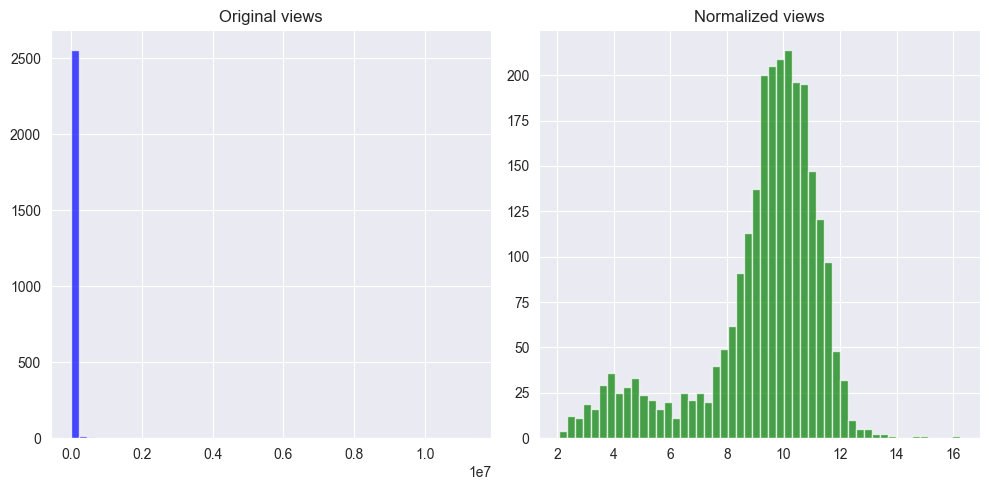

In [304]:
plt.figure(figsize=(10, 5))

for i, hist in enumerate(histograms, 1):
    plt.subplot(1, 2, i)
    plt.hist(df[hist["column"]], bins=hist["bins"], color=hist["color"], alpha=hist["alpha"])
    plt.title(hist["title"])

plt.tight_layout()
plt.show()

In [305]:
df['normalized_downloads'] = df['downloads'].apply(np.log1p)

In [306]:
histograms = [
    {"column": "downloads", "bins": 50, "color": "blue", "alpha": 0.7, "title": "Original downloads"},
    {"column": "normalized_downloads", "bins": 50, "color": "green", "alpha": 0.7, "title": "Normalized downloads"}
]

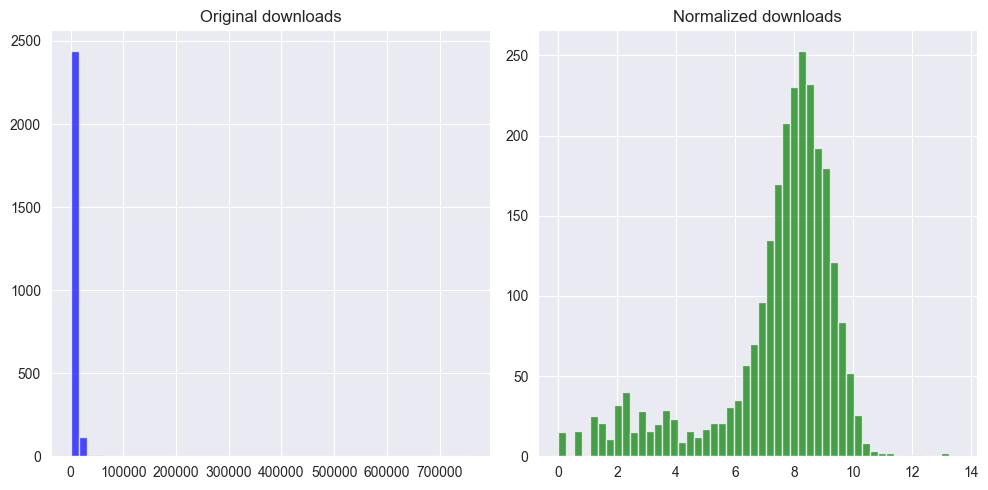

In [307]:
plt.figure(figsize=(10, 5))

for i, hist in enumerate(histograms, 1):
    plt.subplot(1, 2, i)
    plt.hist(df[hist["column"]], bins=hist["bins"], color=hist["color"], alpha=hist["alpha"])
    plt.title(hist["title"])

plt.tight_layout()
plt.show()

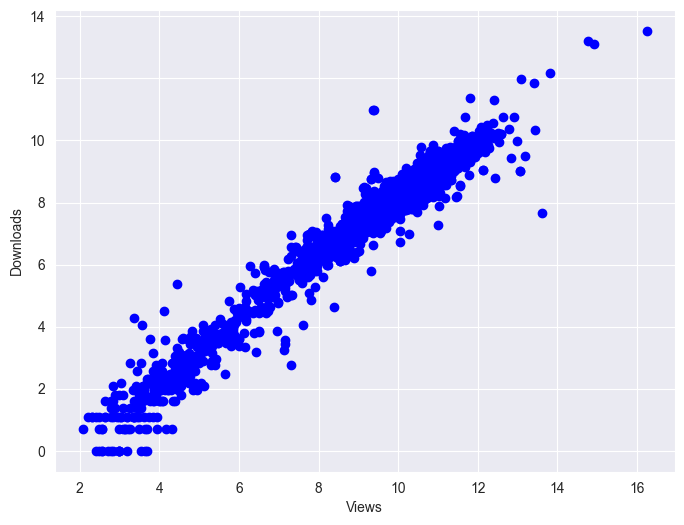

In [308]:
X = df.normalized_views
y = df.normalized_downloads

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue')
plt.xlabel('Views')
plt.ylabel('Downloads')
plt.show()

#### Baseline решение

In [309]:
X = df[['normalized_views']]
y = df['normalized_downloads']

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [311]:
model = LinearRegression()

In [312]:
model.fit(X_train, y_train)

LinearRegression()

In [313]:
y_pred = model.predict(X_test)

In [314]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [315]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 0.25
R^2 Score: 0.95


#### Перебор гиперпараметров

In [316]:
X = df[['normalized_views']]
y = df['normalized_downloads']

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [318]:
ridge = Ridge()

In [319]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [320]:
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [321]:
best_model = grid_search.best_estimator_
print(f'Best alpha: {grid_search.best_params_["alpha"]}')

Best alpha: 0.01


In [322]:
y_pred = best_model.predict(X_test)

In [323]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [324]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 0.25
R^2 Score: 0.95


#### Моя реализация

In [325]:
class MyLinearRegression:
    def __init__(self):
        self.a = None 
        self.b = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        
        self.b = theta[0]  
        self.a = theta[1:]

    def predict(self, X):
        return X.dot(self.a) + self.b

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        mse = np.mean((y - y_pred) ** 2)
        r2 = 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2)
        return mse, r2

In [326]:
X = df[['normalized_views']]
y = df['normalized_downloads']

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [328]:
model = MyLinearRegression()

In [329]:
model.fit(X_train, y_train)

In [330]:
y_pred = model.predict(X_test)

In [331]:
mse, r2 = model.evaluate(X_test, y_test)

In [332]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 0.25
R^2 Score: 0.95


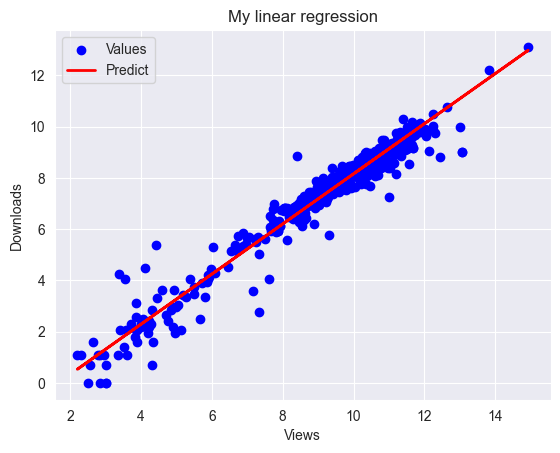

In [333]:
plt.scatter(X_test, y_test, color="blue", label="Values")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predict")
plt.title("My linear regression")
plt.xlabel("Views")
plt.ylabel("Downloads")
plt.legend()
plt.show()

#### Качество модели на каждой эпохе

In [334]:
X = df[['normalized_views']].values
y = df['normalized_downloads'].values

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [336]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [337]:
n_epochs = 100
learning_rate = 0.01
m, n = X_train_scaled.shape

In [338]:
theta = np.zeros((n + 1,))
X_train_aug = np.c_[np.ones((m, 1)), X_train_scaled]

In [339]:
mse_train_history = []
mse_test_history = []
r2_train_history = []
r2_test_history = []

In [340]:
X_test_aug = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

In [341]:
for epoch in range(n_epochs):
    y_pred_train = X_train_aug @ theta

    error = y_pred_train - y_train

    gradients = 2 / m * X_train_aug.T @ error
    theta -= learning_rate * gradients

    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    mse_train_history.append(mse_train)
    r2_train_history.append(r2_train)

    y_pred_test = X_test_aug @ theta
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    mse_test_history.append(mse_test)
    r2_test_history.append(r2_test)

In [342]:
print(f'Test MSE: {mse_test:.2f}')
print(f'Test R²: {r2_test:.2f}')

Test MSE: 1.23
Test R²: 0.75


In [343]:
plots = [
    {"data": mse_train_history, "label": "Train MSE", "color": "blue", "ylabel": "MSE", "title": "Train vs Test", "test_data": mse_test_history, "test_label": "Test MSE", "test_color": "orange"},
    {"data": r2_train_history, "label": "Train R²", "color": "green", "ylabel": "R²", "title": "Train vs Test", "test_data": r2_test_history, "test_label": "Test R²", "test_color": "red"}
]

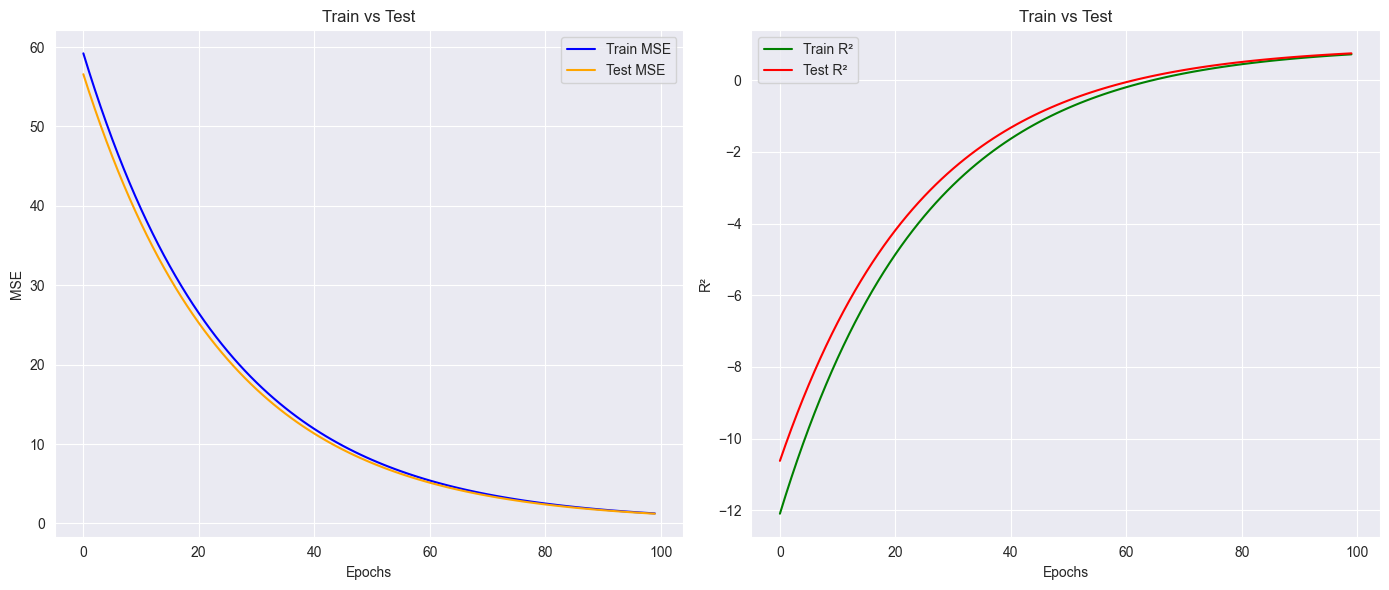

In [344]:
plt.figure(figsize=(14, 6))

for i, plot in enumerate(plots, 1):
    plt.subplot(1, 2, i)
    plt.plot(range(n_epochs), plot["data"], label=plot["label"], color=plot["color"])
    plt.plot(range(n_epochs), plot["test_data"], label=plot["test_label"], color=plot["test_color"])
    plt.xlabel('Epochs')
    plt.ylabel(plot["ylabel"])
    plt.title(plot["title"])
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()